# Predicting Price Undercutting Behaviour

An Online Travel Agent (OTA) is a website that offers travel-related services such as hotel
reservations, flights and ancillary services (e.g. tours and ground transportation), e.g. Expedia and Booking.com. A room price is said to be **undercut** if an OTA is offering the same room for a lower price than the hotel directly (i.e. the hotel is being undercut by an OTA).

* The task here is to produce a model that seeks to predict undercutting behaviour by OTAs.


* We will use some functions coded in the **`undercut.py`** script, which contains the full pipeline presented here



In [1]:
# Plotting imports

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

_ = sns.set(style="whitegrid", rc={"figure.figsize": (12, 6),
#                                "legend.fontsize": "large",
                               "axes.titlesize": "large",
                               "xtick.labelsize": "large",
                               "ytick.labelsize": "large",
                               })

In [2]:
import pandas as pd
import numpy as np

# The Data

The dataset contained over 1 million price events recorded with the following columns:

**Column name**|**Description**
:-----:|:-----:
ota|Identifier of the OTA
direct\_price|Price of the room offered on the hotel website
ota\_price|Price of the room offered by the OTA
received\_time|Timestamp of when the search was made
adults|Number of adults the search is for
children|Number of children the search is for
user\_country|The country recorded for the session (ISO 3166-1 alpha-2 format), e.g. US.
client|Identifier of client / hotel group
hotel|Identifier of hotel. Note: a client may have multiple hotels.
currency|Currency code (ISO 4217 format), e.g. USD.

In [3]:
# Read data
df = pd.read_csv('data/ds_test_000000000000')
df.shape

(1148079, 10)

This is how the first few rows look:

In [5]:
df.head()

,received_time,client,hotel,adults,children,currency,ota,ota_price,direct_price,user_country
0,2018-02-02 15:51:58.156 UTC,nAINDtwooFKqfvvzjrnoGzqsPdM=,g0ZoIj6NwWM6BOZP93yAPOfi/3WM0Rfih2BEAP/V0A8=,2,0,RUB,Big Bad Wolf,16533.19,11859.660000,RU
1,2017-11-22 09:03:13.943 UTC,j7ooHJKDYPyqCjxYqsXVyUC3Zms=,s6/1irGNi4y3iTyvu3xBQvcGMhJObL2MKKLn/NBp4mY=,3,0,THB,Madam Mim,2905.00,2224.299065,SG
2,2018-01-09 17:09:06.415 UTC,k2csQHYSQN4LokKeDmC9jKi8lNk=,tljsEqITzJynGBAPhl9xboa24CmWSE7TgLb/Bzh36ok=,2,0,PHP,Madam Mim,11543.00,9200.000000,PH
3,2017-10-30 09:02:54.948 UTC,0exUs3dolgyENIDR+l+Udv59jl4=,KZxRpRejNobIe/SPIynitk3sFEwc0y+3bWGYuHD7eX4=,1,0,MYR,Big Bad Wolf,648.32,413.000000,AU
4,2017-05-08 16:41:15.179 UTC,anwksD5xwgAwhRM7STgscMwUQso=,uflQP9PibFEvIwe5GOsVPCkfnc27QwHMXh4Hq+fK4fA=,2,0,COP,Chernabog,NaN,227612.960000,CO


In [4]:
df.dtypes

received_time     object
client            object
hotel             object
adults             int64
children           int64
currency          object
ota               object
ota_price        float64
direct_price     float64
user_country      object
dtype: object

# Data Preprocessing and Cleaning

**NOTE:** For now we will be doing this part on the whole dataset but in practice one should split into train and test and do these steps separately

### Convert time columns to datetime

Want to convert `received_time` columns into datetime object so we can extract features and plots. This takes a bit long due to large size:

In [8]:
# Convert datetime col to datetime obj (takes long! :()

import time
from undercut import print_runtime

start_time = time.time()
df['received_time'] = pd.to_datetime(df['received_time'])
print_runtime(start_time)


Run time: 0h:3m:48s


### Missing values

We have missing data mainly in `ota_price` - seems it is now always possible to get these prices?

Due to time contrains, got rid of these but with more time could try to **impute** them by using, e.g. the mean value per OTA

In [10]:
df.isnull().sum()

received_time         0
client                0
hotel                 0
adults                0
children              0
currency              0
ota                   0
ota_price        290261
direct_price          0
user_country       5763
dtype: int64

In [12]:
df = df.dropna()
df.shape

(852845, 10)

### Currencies to lowercase

A few cases have the currency in lowercase and should upper-case it so it doesn't count as a new category:

In [14]:
# Show unique currencies in dataset
l = np.unique(df['currency'])
print(len(l))
l

132


array(['AED', 'AFN', 'ALL', 'AMD', 'ANG', 'AOA', 'ARS', 'AUD', 'AWG',
       'AZN', 'BAM', 'BBD', 'BDT', 'BGN', 'BHD', 'BMD', 'BND', 'BRL',
       'BSD', 'BWP', 'BYR', 'CAD', 'CHF', 'CLP', 'CNY', 'COP', 'CRC',
       'CVE', 'CYP', 'CZK', 'DJF', 'DKK', 'DOP', 'DZD', 'EGP', 'EUR',
       'FJD', 'FKP', 'GBP', 'GIP', 'GNF', 'GTQ', 'HKD', 'HNL', 'HRK',
       'HUF', 'IDR', 'ILS', 'INR', 'IQD', 'ISK', 'ITL', 'JOD', 'JPY',
       'KES', 'KHR', 'KRW', 'KWD', 'KZT', 'LBP', 'LKR', 'LRD', 'LSL',
       'LVL', 'MAD', 'MDL', 'MOP', 'MRO', 'MUR', 'MXN', 'MYR', 'NAD',
       'NGN', 'NIO', 'NOK', 'NPR', 'NZD', 'OMR', 'PAB', 'PEN', 'PGK',
       'PHP', 'PKR', 'PLN', 'PYG', 'QAR', 'RON', 'RSD', 'RUB', 'SAR',
       'SCR', 'SDG', 'SEK', 'SGD', 'SRD', 'THB', 'TMT', 'TND', 'TRY',
       'TTD', 'TWD', 'TZS', 'UAH', 'USD', 'UYU', 'VEF', 'VND', 'VUV',
       'XAF', 'XCD', 'XOF', 'XPF', 'YER', 'ZAR', 'ars', 'aud', 'bhd',
       'brl', 'cad', 'chf', 'eur', 'gbp', 'hkd', 'idr', 'inr', 'jpy',
       'krw', 'mxn',

In [16]:
# Get all currencies to upper case so they are not duplicated as cat
df['currency'] = df['currency'].apply(lambda x: x.upper())

# Check
l = np.unique(df['currency'])
print(len(l))

114


So we reduced the number of different currencies by 18 :)

### Price outliers

* Also found quite a few outliers in the `ota_price` and `direct_price` columns. As the target we want to predict will depend on these, I thought it was important to handle them. Due to time constrains, the easiest was to get rid of them. With more time one would investigate on a case by case basis whether it is valid to remove them).


* As prices are in different currencies, I applied a systematic approach to get rid of them on a per currency basis by using the IQR 1.5 outlier rule (https://en.wikipedia.org/wiki/Interquartile_range#Outliers)


* The function I coded for this looked like this:

```python
def remove_price_outliers(df, column_name):

    # Using IQR * 1.5 methodology
    column = df[column_name]
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    # Exclude cases when prices are 0
    filtered = df.query('0 < ' + column_name + ' <= (@Q3 + 1.5 * @IQR)')
    # filtered = filtered[filtered[column_name]>0.0]

    mask = df.isin(filtered)[column_name]

    return ~mask
```

This is how the price distribution for `currency==USD` looked **before** outlier removal:

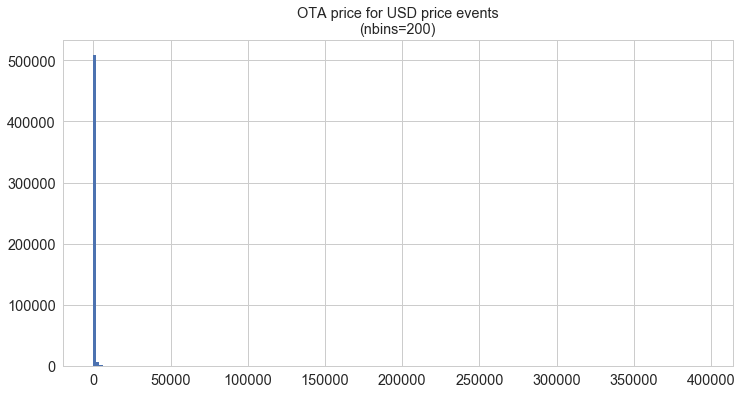

In [22]:
_ = df[df['currency'] == 'USD']['ota_price'].hist(bins=200)
_ = plt.title('OTA price for USD price events\n(nbins=200)')

So this histogram is pretty meaningless in this state....

In [19]:
print('Before removing outliers: ', df.shape)

Before removing outliers:  (852845, 11)


Now let's remove outliers:

In [18]:
from undercut import remove_price_outliers

# Lots of outliers in the prices on a per currency basis, so will apply a remove procedure based on IQR
grouped = df[['currency', 'direct_price', 'ota_price']].groupby('currency')
for name, group in grouped:
    outlier = (remove_price_outliers(group, 'direct_price')) | (remove_price_outliers(group, 'ota_price'))
    df.loc[group.index, 'price_outlier'] = np.where(outlier == 1, 1, 0)

# Remove all prices tagged as outlier
df = df[df['price_outlier'] != 1]
# Remove this column as we no longer need it
df = df.drop('price_outlier', axis=1)

In [24]:
print('After removing outliers: ', df.shape)

After removing outliers:  (758468, 11)


This means outlier removal reduced the dataset by about 11%... but now the data looks much better:

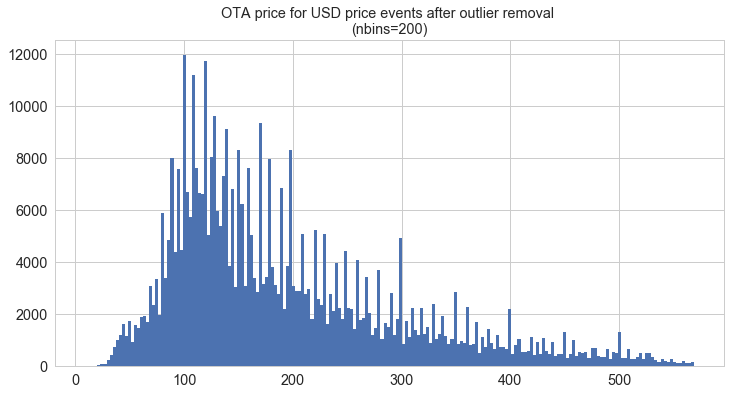

In [27]:
_ = df[df['currency'] == 'USD']['ota_price'].hist(bins=200)
_ = plt.title('OTA price for USD price events after outlier removal \n(nbins=200)')

# Defining a currency agnostic target

We want to predict undercutting behaviour by OTAs but we have prices in different currencies. Hence we need to define a **currency agnostic** variable which can represent overpricing and underpricing. For this I used the ratio of `ota_price` to `direct_price`, which I call `price_ratio` below, such that:

* when `price_ratio` >= 1, OTA is not considered to be undercutting, i.e. OTA is more expensive than hotel
* when `price_ratio` < 1, OTA is considered to be undercutting, i.e. OTA is cheaper than hotel

In [29]:
# Create currency agnostic measure of disparity which can be used for binary target
# (already handled cases of div by zero earlier)
df['price_ratio'] = df['ota_price'] / df['direct_price']

## Removing outliers (again)

In [58]:
# Get some statistics
df['price_ratio'].describe()

count    7.584680e+05
mean     1.378850e+01
std      3.842363e+03
min      6.759784e-04
25%      1.000000e+00
50%      1.033783e+00
75%      1.111111e+00
max      1.988457e+06
Name: price_ratio, dtype: float64

This shows we still have some outliers, despites applying the outlier removal procedure earlier separately on `ota_price` and `direct_price` as 75% of the values are below 1.1, and the max is 6 orders of magnitude bigger!

Let's look at this case seaprately:

In [60]:
df[df['price_ratio'] == df['price_ratio'].max()]

,received_time,client,hotel,adults,children,currency,ota,ota_price,direct_price,user_country,price_outlier,price_ratio,undercut
720664,2018-01-02 22:58:51.928,GcypXiOmBSKTfKKIEqjvGpUf0FE=,rMXnCOiNfKc21ziBEHWTzWfKPgkkrrpKOEKKJ6NYcwE=,3,0,IDR,Cruella De Vil,4425944.0,2.225818,ID,0.0,1.988457e+06,0


Looking at the `ota_price` and `direct_price` for this case we see quite a huge disparity, which makes it more likely it is a true outlier. Given the short time, we will proceed to remove `price_ratio` outliers using the same IQR rule defined above:

In [67]:
df.shape

(758468, 13)

In [68]:
# Remove outliers in price_ratio
outlier = remove_price_outliers(df, 'price_ratio')
df = df[~outlier]
df.shape

(691697, 13)

This removed about 8.8% of the rows.

In [73]:
# Get some statistics
df['price_ratio'].describe()

count    691697.000000
mean          1.036566
std           0.098489
min           0.000676
25%           1.000000
50%           1.025137
75%           1.067945
max           1.277770
Name: price_ratio, dtype: float64

This now looks better! :)

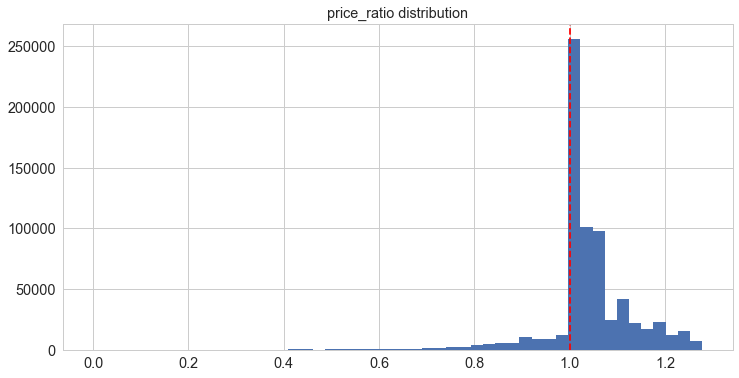

In [86]:
# mask = df['price_ratio'] > 0.8
# df[mask]['price_ratio'].hist(bins=0)
df['price_ratio'].hist(bins=50)
plt.axvline(x=1.0, color='red', linestyle='--')
plt.title('price_ratio distribution')

From above we observe this distribution is very different to a normal distribution!

* Undercutting events are a lot less common than overpricing ones. Also these seem to have a wider range of values than overpricing, which are fairly small - when OTAs overprice, these seem to be mostly ~6-7% above the hotel direct price
* Most of the price differences are small, hence why we see the peak close to 1


## Binarizing the target

As for the target, we could use directly `price_ratio` if we chose a `LinearRegression` model to predict numerical values. However, this is a harder task in ML to get right than bucketing the range of values to a **binary target**. So in the interest of time, here we will go for this approach to use a supervised binary classification model like **Logistic Regression.**

In [30]:
# This will be the binary target in our classifier
df['undercut'] = np.where(df['price_ratio'] < 1, 1, 0)


This is how this now looks:

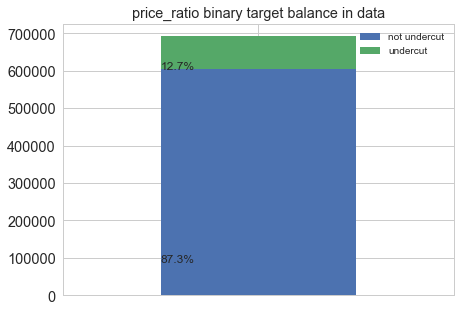

In [87]:
ax = pd.DataFrame(df['undercut'].value_counts()).T.plot(kind='bar', stacked=True, figsize=(7, 5))
_ = ax.set_xticklabels([])
plt.legend(['not undercut', 'undercut'])

for p in ax.patches:
    p_height = p.get_height()
    pct = (1 - p_height / df.shape[0]) * 100
    ax.annotate('{:.1f}%'.format(pct), (p.get_x(), p_height))
    
_ = plt.title('price_ratio binary target balance in data')

## Class imbalance

The bar chart above shows we have only 11.6% of cases when the OTA undercut, which is very little in size wrt to the dataset size. We are after all aiming to predict when an OTA undercuts and models would perform poorly if fed such imbalanced dataset as they would mainly end up predicting the 'majority class'. There are many ways to deal with this problem, such as:

* Downsampling majority class
* Upsampling minority class
* Optimising on recall or F1

Here I chose the fastest, which was downsampling

### Downsampling

The idea is to randomly sample without replacement from the majority class (i.e. the class with more observations) to create a new subset of observation equal in size to the minority class.

In [88]:
# Before downsampling
df.shape

(691697, 13)

In [89]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['undercut'] == 0]
df_minority = df[df['undercut'] == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # sample without replacement
                                   n_samples=df_minority.shape[0],  # to match minority class
                                   random_state=0)  # reproducible results

# Combine minority class with downsampled majority class
df = pd.concat([df_majority_downsampled, df_minority])

# Reset index since we removed lots of rows
df = df.reset_index(drop=True)

# Display new class counts
print('After downsampling: ', df.shape)
print('New class balance:', df['undercut'].value_counts())

After downsampling:  (175812, 14)
New class balance: 1    87906
0    87906
Name: undercut, dtype: int64


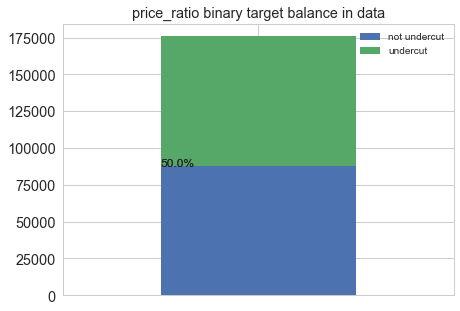

In [90]:
ax = pd.DataFrame(df['undercut'].value_counts()).T.plot(kind='bar', stacked=True, figsize=(7, 5))
_ = ax.set_xticklabels([])
plt.legend(['not undercut', 'undercut'])

for p in ax.patches:
    p_height = p.get_height()
    pct = (1 - p_height / df.shape[0]) * 100
    ax.annotate('{:.1f}%'.format(pct), (p.get_x(), p_height))
    
_ = plt.title('price_ratio binary target balance in data')

Nicely now we see both targets well balanced and that we still have a decent sample of ~90k each and can proceed to feature engineering

# Feature Engineering

## Original Features

Before moving on to building new features, let's look at what we have in the original dataset:

In [93]:
df.head()

,received_time,client,hotel,adults,children,currency,ota,ota_price,direct_price,user_country,price_outlier,price_ratio,undercut
0,2018-01-01 02:06:42.849,aiaEq6v17KFy5hgbXm3p+PpunB0=,8BrGJ743dm34rvKlQi15g44bB11FzBTCOBhVJubdBPg=,2,0,USD,Queen Grimhilde,182.34,182.33,US,0.0,1.000055,0
1,2017-12-30 21:15:08.849,gcGfvv2VvcnJnCg8l0qmzbjZwNQ=,hcWTO2KAyOcHIpEZstjinG+Ke/ywcLPEPsNVID6Uw5Y=,2,0,USD,Captain Hook,149.00,129.00,US,0.0,1.155039,0
2,2017-10-30 03:11:32.375,nsO1uU2LCivSU67XOLL+492KWgc=,SeBtiVdg1cdgtX0JFhDXAwHcCBrBoVL8+daLGeTzIOU=,2,0,AUD,Hades,142.00,115.50,AU,0.0,1.229437,0
3,2017-03-06 09:31:15.401,rRnrT8R6lIzQM3Xw6rGKoNCvynY=,5yKTx4/mORQiEb8RBGPK8R+DIbY7H1S4XHZBBmlvGpM=,4,0,USD,Captain Hook,224.99,216.00,DE,0.0,1.041620,0
4,2017-11-15 00:54:48.803,rRnrT8R6lIzQM3Xw6rGKoNCvynY=,JHkYh12hoJuvy2UX59JAr1IjGGj+dbqqojP3cnTQfAg=,1,0,CAD,Queen Grimhilde,153.64,150.43,CA,0.0,1.021339,0


We have a mixture of categorical and numerical values. Let's first cast the categorical as `pandas` categories.

Also I will replace the `client` and `hotel` hash key values with numbers so they are more compact visually. 

In [94]:
# Cast relevant cols as category type
cats = ['client', 'hotel', 'currency', 'ota', 'user_country']
for cat in cats:
    df[cat] = df[cat].astype('category')

# Rename long client and hotel cats for just numbers
for col in ['client', 'hotel']:
    n_col = np.unique(df[col])
    df[col] = df[col].cat.rename_categories(np.arange(1, n_col.shape[0] + 1))


In [105]:
df.sample(5)

,received_time,client,hotel,adults,children,currency,ota,ota_price,direct_price,user_country,price_ratio,undercut
134087,2018-01-31 21:15:18.816,169,2637,2,0,USD,Captain Hook,85.99,94.99,US,0.905253,1
67267,2018-01-03 20:03:45.079,382,2794,2,0,USD,Hades,156.08,149.76,US,1.042201,0
89848,2018-02-03 06:31:37.573,1215,4971,2,0,ZAR,Hades,1618.49,1900.00,ZA,0.851837,1
44162,2017-11-29 01:39:18.104,689,2599,1,0,USD,Captain Hook,119.20,111.75,US,1.066667,0
140165,2017-11-12 14:27:33.764,719,6734,1,0,CAD,Cruella De Vil,119.00,122.40,CA,0.972222,1


In [104]:
df.dtypes

received_time    datetime64[ns]
client                 category
hotel                  category
adults                    int64
children                  int64
currency               category
ota                    category
ota_price               float64
direct_price            float64
user_country           category
price_ratio             float64
undercut                  int64
dtype: object

From the above columns the below table shows what can be used as a feature and the type, as well as if a transformation is required:   


**Type**|**column**|**Feature?**|**Target?**|**Transformation required?**|**Note**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
Numerical |adults|✔| | |can be used as is
 |children|✔| | |can be used as is
 |ota\_price|✗| | |linked directly to the target
 |direct\_price|✔| |✔|assuming this is known before ota\_price, must scale to be comparable across currencies
 |price\_ratio|✗| | |linked directly to the target
 |undercut|✗|✔| |this is the target (binary form)
Categorical |received\_time|✔| |✔|cyclic nature and linear trends
|client|✔| |✔|create feature from aggregation
 |hotel|✔| |✔|create feature from aggregation
 |currency|✔| |✔|requires binning and one-hot encoding
 |ota|✔| |✔|requires binning and one-hot encoding
 |user\_country|✔| |✔|requires binning and one-hot encoding
 
 
 So all the categorical ones need to be transformed to numerical features somehow. 
 Let's then start by making the required transformations then!

In [107]:
df[cats].describe()

,client,hotel,currency,ota,user_country
count,175812,175812,175812,175812,175812
unique,2198,13863,92,14,193
top,1893,10491,USD,Hades,US
freq,16822,4151,101054,48866,69039


* Dominant OTA in data: Hades
* Dominant country and currency in data: US and USD
* A client can have more than 1 hotel

### Rescaling direct_price

We do this so it's comparable across currencies. For this we use `sklearn`'s `MinMaxScaler` which will scale the prices for each currency to be between 0 and 1

In [110]:
# Before scaling, this is the mean for USD prices
df[df['currency'] == 'USD']['direct_price'].mean()

205.31238314543504

In [112]:
# Before scaling, this is the mean for Japanese Yen prices
df[df['currency'] == 'JPY']['direct_price'].mean()

36174.24370032905

Clearly we can have order of magnitude differences across currencies

In [113]:
from sklearn import preprocessing

# Rescale the direct price (Note again we are doing this on the whole set instead of train, which is cheating)
min_max_scaler = preprocessing.MinMaxScaler()
grouped = df[['currency', 'direct_price']].groupby('currency')
for name, group in grouped:
    df.loc[group.index, 'direct_price_scaled'] = min_max_scaler.fit_transform(group[['direct_price']])


In [115]:
# After scaling, this is the mean for USD prices
df[df['currency'] == 'USD']['direct_price_scaled'].mean()

0.36184187831701964

In [116]:
# Before scaling, this is the mean for Japanese Yen prices
df[df['currency'] == 'JPY']['direct_price_scaled'].mean()

0.43269116460237805

That's now better and we can use it as a feature!

### Time features

We can derive these from the `received_time` column by extracting the year, month, weekday. However months and weekdays are cyclical, so these are better handled by calculating the sin and cos component so that you represent your cyclical feature as (x,y) coordinates of a circle. In this representation hour, 23 and hour 0 are right next to each other numerically, just as they should be.

Note however tha year is non-cyclic, so we don't apply this transformation to years - we just simply rebase them to represent number of years transcurred.

In [117]:
# Re-index to received_time so can groupby time and create time features quickly from this
# Note: this is faster than applying lambda func over all rows to get hour, weekday, month and year
temp = df[['received_time']].copy()
temp.index = temp['received_time']

# Cyclic time - get sine and cosine
df['h'] = temp.index.hour
df['w'] = temp.index.weekday
df['m'] = temp.index.month
# Hours numbered 0-23
df['h_sin'] = np.sin(df['h'] * (2. * np.pi / 24))
df['h_cos'] = np.cos(df['h'] * (2. * np.pi / 24))
# Weeks numbered 0-6
df['w_sin'] = np.sin(df['w'] * (2. * np.pi / 7))
df['w_cos'] = np.cos(df['w'] * (2. * np.pi / 7))
# Months numbered 1-12, hence we subtract 1
df['m_sin'] = np.sin((df['m'] - 1) * (2. * np.pi / 12))
df['m_cos'] = np.cos((df['m'] - 1) * (2. * np.pi / 12))

# Non-cyclic time

# Years
df['yr'] = temp.index.year
# Rebase years
df['yr_r'] = np.max(df['yr']) - df['yr']

And this is how they look for hours for example:

In [9]:
df[['h', 'h_sin', 'h_cos']].sample(10)

,h,h_sin,h_cos
11506,4,8.660254e-01,0.500000
167110,2,5.000000e-01,0.866025
164993,20,-8.660254e-01,0.500000
94217,17,-9.659258e-01,-0.258819
169674,23,-2.588190e-01,0.965926
354,15,-7.071068e-01,-0.707107
59280,16,-8.660254e-01,-0.500000
67737,12,1.224647e-16,-1.000000
57324,22,-5.000000e-01,0.866025
80368,0,0.000000e+00,1.000000


Let's also do some visualisation on how `price_ratio` evolves over the hours of the day, day of the week, month and year. We will limit this analysis to the top 4 OTAs by search volume.

In [19]:
# Get the top 4 OTAs by search volume
top_otas = df[['ota', 'received_time']].groupby('ota').count()
top_otas = top_otas.sort_values('received_time', ascending=False).head(4)
top_otas = top_otas.index.tolist()
top_otas

['Hades', 'Captain Hook', 'Queen Grimhilde', 'Cruella De Vil']

Captain Hook (22806, 24)
Cruella De Vil (11550, 24)
Hades (23093, 24)
Queen Grimhilde (11390, 24)


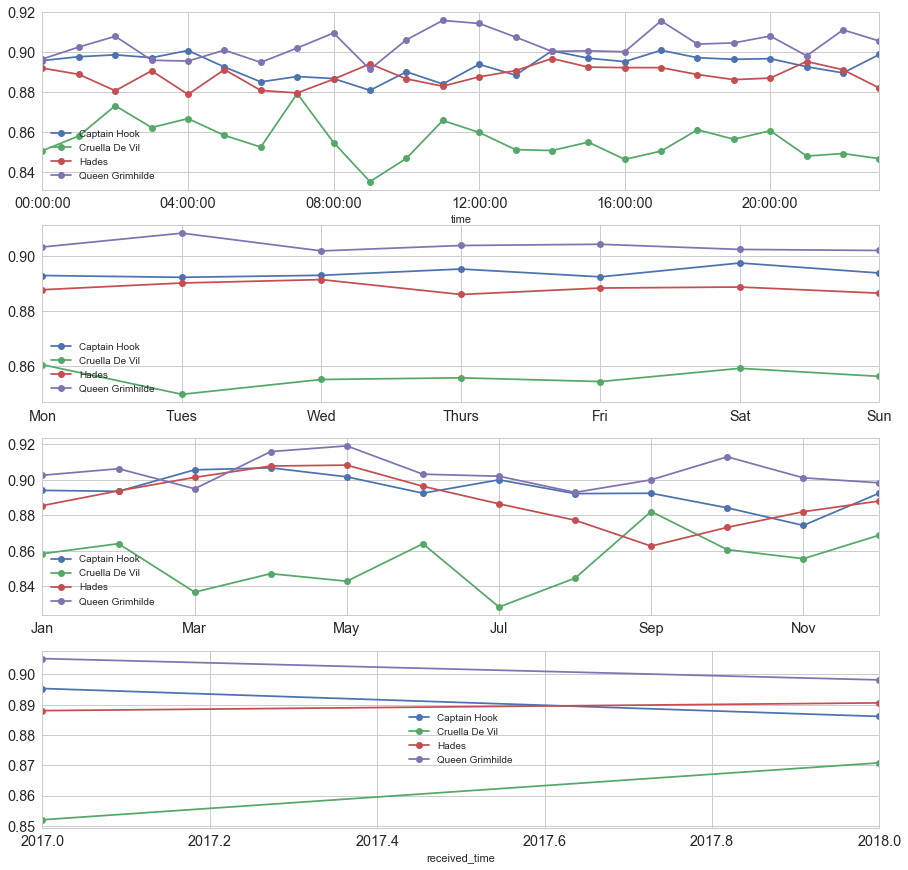

In [48]:
# Plot price_ratio mean value over time of the day, week day, month and year
# Applying undercut filter and using mean

grouped = df.groupby('ota')

hourly_ticks = 4 * 60 * 60 * np.arange(6)
weekly_ticks = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
monthly_ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(15,15))
# plt.title('Price ratio mean value over time of the day, week day, month and year')

for name, group in grouped:
    if name in top_otas:
        group.index = group['received_time']
        group = group.drop('received_time', axis=1)
        group = group[group['undercut'] == 1]
        print(name, group.shape)    
        group = group.resample('H').mean()
        
        by_hour = group['price_ratio'].groupby(group.index.time).mean()
        by_hour.plot(xticks=hourly_ticks, label=name, ax=ax1, marker='o')
        
        by_weekday = group['price_ratio'].groupby(group.index.dayofweek).mean()
        by_weekday.index = weekly_ticks
        by_weekday.plot(label=name, ax=ax2, marker='o')

        by_month = group['price_ratio'].groupby(group.index.month).mean()
        by_month.index = monthly_ticks
        by_month.plot(label=name, ax=ax3, marker='o')

        by_year = group['price_ratio'].groupby(group.index.year).mean()
        by_year.plot(label=name, ax=ax4, marker='o')
        

# _ = ax2.set_xticklabels(weekly_ticks)
# _ = ax3.set_xticklabels(monthly_ticks)

_ = ax1.legend()
_ = ax2.legend()
_ = ax3.legend()
_ = ax4.legend()



* Cruella De Vil seems to undercut more than the others others across all time frames
* Undercutting seems to have decreased in 2018 vs 2017 (although this could be biased as the year hasn't finished)

OVeral it is difficult to infer a particular seasonality from these plots given the large tails of the price_Ratio distributions and the fact that we are biasing these plots by taking the mean. So I think it is better to visualise this in box-plots as shown below:

* Note below we only look at 2 OTAs and also we apply a filter of undercut==True to be able to visualise better those events
* The observations may be biased as we don't have a full dataset for 2018

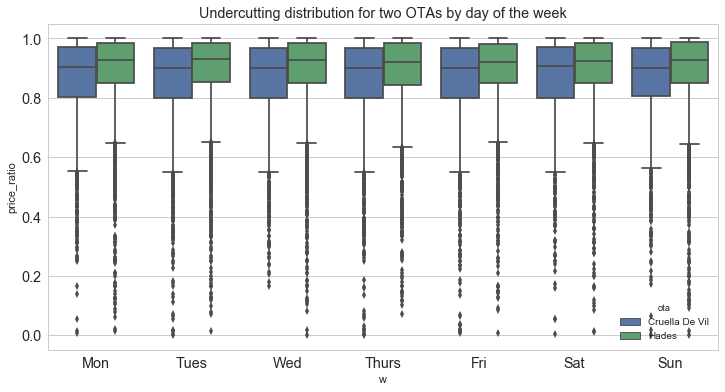

In [94]:
mask = df['ota'].apply(lambda x: True if x in ['Hades', 'Cruella De Vil'] else False)
temp = df[(mask) & (df['undercut'] == 1)].copy()
temp['ota'] = temp['ota'].cat.remove_unused_categories()
temp.shape
ax = sns.boxplot(x="w", y="price_ratio", hue='ota', data=temp)
_ = ax.set_xticklabels(weekly_ticks)
plt.title('Undercutting distribution for two OTAs by day of the week')

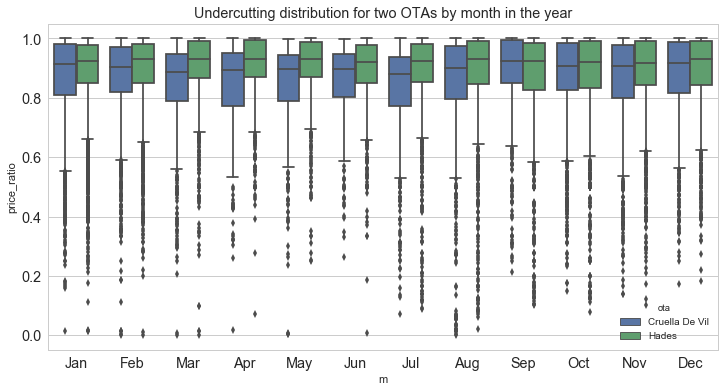

In [95]:
mask = df['ota'].apply(lambda x: True if x in ['Hades', 'Cruella De Vil'] else False)
temp = df[(mask) & (df['undercut'] == 1)].copy()
temp['ota'] = temp['ota'].cat.remove_unused_categories()
temp.shape
ax = sns.boxplot(x="m", y="price_ratio", hue='ota', data=temp)
_ = ax.set_xticklabels(monthly_ticks)
plt.title('Undercutting distribution for two OTAs by month in the year')

Both seem to undercut a bit more during the Spring and Summer seasons, although it is a stronger patter for Cruella De Vil.

## New features from aggregations

We focus on building new features based on aggregations of the data. Note that below we are cheating in the sense that we are aggregating over all data, instead of just the train set. By doing this we make a big assumption that the distributions for the below variables doesn't change much on the test set or with new data.

### Is the hotel part of a chain?

Here we infer this info by counting the number of distinct hotels with the same client id and if it's > 1, then it is part of a chain, else not.

In [118]:
# Is the hotel part of a chain?
hotels_per_client = df[['client', 'hotel']].groupby('client').nunique().sort_values('hotel', ascending=False)
hotels_per_client = hotels_per_client.rename(columns={'hotel': 'n_hotels'})
hotels_per_client = hotels_per_client[['n_hotels']]
df = df.join(hotels_per_client, on='client')
df['chain'] = np.where(df['n_hotels'] > 1, 1, 0)


In [120]:
# Top 5 clients by largest number of hotels owned
hotels_per_client.head()

,n_hotels
client,
1893,2118
382,854
1606,676
1134,506
773,421


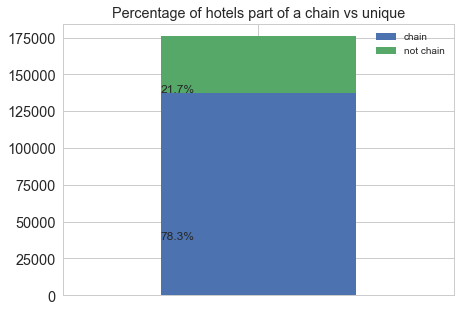

In [127]:
# Percentage of hotels part of a chain vs unique
ax = pd.DataFrame(df['chain'].value_counts()).T.plot(kind='bar', stacked=True, figsize=(7, 5))
_ = ax.set_xticklabels([])
plt.legend(['chain', 'not chain'])

for p in ax.patches:
    p_height = p.get_height()
    pct = (1 - p_height / df.shape[0]) * 100
    ax.annotate('{:.1f}%'.format(pct), (p.get_x(), p_height))
    
_ = plt.title('Percentage of hotels part of a chain vs unique')

### Number of rooms required

We don't have this data available but we can create a feature on the distinct searches wrt number of adults - this correlates to the number of rooms requested as children are usually fitted within the same room as the adults

In [105]:
# nunique number of adults per hotel equates to number of rooms requested
rooms_per_hotel = df[['hotel', 'adults']].groupby('hotel').nunique().sort_values('adults', ascending=False)
rooms_per_hotel = rooms_per_hotel.rename(columns={'adults': 'n_rooms'})
rooms_per_hotel = rooms_per_hotel[['n_rooms']]
df = df.join(rooms_per_hotel, on='hotel')

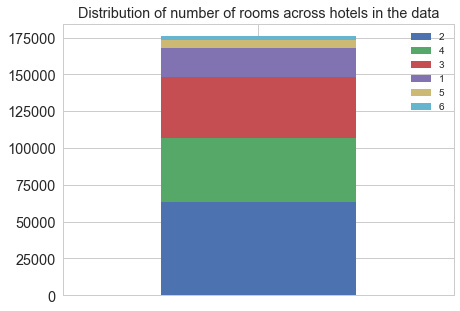

In [106]:
# Percentage of hotels part of a chain vs unique
ax = pd.DataFrame(df['n_rooms'].value_counts()).T.plot(kind='bar', stacked=True, figsize=(7, 5))
_ = ax.set_xticklabels([])
_ = plt.title('Distribution of number of rooms across hotels in the data')


As expected, it seems most hotels are requested only 1 or 2 rooms at most

### Demand for hotel

We infer this from the data by using the number of searches performed for a given hotel. Perhaps this is a factor for OTAs to undercut more or less

In [107]:
searches_by_hotel = df[['hotel', 'received_time']].groupby('hotel').nunique().sort_values('received_time',
                                                                                          ascending=False)
searches_by_hotel = searches_by_hotel.rename(columns={'received_time': 'n_searches'})
searches_by_hotel = searches_by_hotel[['n_searches']]
df = df.join(searches_by_hotel, on='hotel')


In [108]:
searches_by_hotel.head()

,n_searches
hotel,
10491,4151
9787,1839
1942,1631
2539,997
1629,715


The above hotels seem to be the most popular

## Categorical Features

### Reducing Dimensionality

For the columns `user_country` and `currency` we have too many categories:

In [109]:
np.unique(df['user_country'])

array(['AD', 'AE', 'AF', 'AG', 'AI', 'AL', 'AM', 'AO', 'AR', 'AS', 'AT',
       'AU', 'AW', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BL',
       'BM', 'BN', 'BO', 'BQ', 'BR', 'BS', 'BW', 'BY', 'BZ', 'CA', 'CD',
       'CH', 'CI', 'CK', 'CL', 'CM', 'CN', 'CO', 'CR', 'CV', 'CW', 'CY',
       'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES',
       'ET', 'FI', 'FJ', 'FM', 'FO', 'FR', 'GA', 'GB', 'GD', 'GE', 'GF',
       'GG', 'GH', 'GI', 'GL', 'GN', 'GP', 'GR', 'GT', 'GU', 'GW', 'GY',
       'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IM', 'IN', 'IQ',
       'IS', 'IT', 'JE', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KN', 'KR',
       'KW', 'KY', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LS', 'LT', 'LU',
       'LV', 'MA', 'MC', 'MD', 'ME', 'MF', 'MG', 'MH', 'MK', 'ML', 'MM',
       'MN', 'MO', 'MP', 'MQ', 'MR', 'MT', 'MU', 'MV', 'MW', 'MX', 'MY',
       'MZ', 'NC', 'NG', 'NI', 'NL', 'NO', 'NP', 'NZ', 'OM', 'PA', 'PE',
       'PF', 'PG', 'PH', 'PK', 'PL', 'PR', 'PS', 'P

In [110]:
np.unique(df['currency'])

array(['AED', 'ANG', 'AOA', 'ARS', 'AUD', 'AZN', 'BAM', 'BDT', 'BGN',
       'BHD', 'BRL', 'BSD', 'BWP', 'CAD', 'CHF', 'CLP', 'CNY', 'COP',
       'CRC', 'CVE', 'CYP', 'CZK', 'DJF', 'DKK', 'DOP', 'DZD', 'EGP',
       'EUR', 'FJD', 'GBP', 'GTQ', 'HKD', 'HRK', 'HUF', 'IDR', 'ILS',
       'INR', 'IQD', 'ISK', 'ITL', 'JOD', 'JPY', 'KES', 'KHR', 'KRW',
       'KWD', 'LBP', 'LKR', 'LRD', 'LVL', 'MAD', 'MDL', 'MOP', 'MUR',
       'MXN', 'MYR', 'NAD', 'NGN', 'NIO', 'NOK', 'NPR', 'NZD', 'OMR',
       'PEN', 'PGK', 'PHP', 'PKR', 'PLN', 'PYG', 'QAR', 'RON', 'RSD',
       'RUB', 'SAR', 'SEK', 'SGD', 'SRD', 'THB', 'TMT', 'TND', 'TRY',
       'TTD', 'TWD', 'UAH', 'USD', 'UYU', 'VEF', 'VND', 'VUV', 'XCD',
       'XPF', 'ZAR'], dtype=object)

We could convert each of this to a binary column but we then would hit the so called `dimensionality curse` - having too many dimensions. So the approach here is to bin these categories into subsets, hence decreasing the number of columns:

* For `user_country` a logical bining is to map these to continents
* For  `currency` a logical binning would be to map these to major curencies (e.g. 'USD', 'EUR' and 'GBP') vs 'other', or just create a single binary column to specific whether it is `major` or not

In [112]:
from undercut import map_country, map_currency

# Reduce dimensionality of cat features

continent_dict = open_pickle('data/continent_dict.p')
df['user_continent'] = df['user_country'].apply(lambda x: map_country(x))

df['currency_v2'] = df['currency'].apply(lambda x: map_currency(x))
df['major_currency'] = np.where(df['currency_v2'] != 'other', 1, 0)


This is how they look:

In [126]:
df[['user_country', 'user_continent', 'currency', 'currency_v2', 'major_currency']].sample(5)

,user_country,user_continent,currency,currency_v2,major_currency
80663,US,NA,USD,USD,1
142170,DE,EU,EUR,EUR,1
47396,US,NA,USD,USD,1
66653,US,NA,USD,USD,1
73480,GB,EU,ZAR,other,0


## One-hot Encoding of Categorical Features

The last step before feeding to the model, is to convert the selected categorical features into binary columns, a.k.a. one-hot encoding.

So for example, for `user_continent`, this would look like this:

In [130]:
pd.get_dummies(df['user_continent']).head()

,AF,AS,EU,NA,OC,SA,other
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


We will do this below once we select the features to construct the feature matrix `X`

# Defining the Feature Matrix X and the Target y

Below is the selection of columns which imo makes sense to include, split by numerical and categorical. The categorical ones must be one-hot-encoded

In [132]:
# Define columns to build feature matrix X

numerical = [
    # raw
    'adults', 'children', 
    # scaled
    'direct_price_scaled',  
    # time
    'h_sin', 'h_cos', 'w_sin', 'w_cos', 'm_sin', 'm_cos', 'yr_r',  
    # aggregations
    'n_hotels', 'n_rooms', 'n_searches',  
    # binary
    'chain', 'major_currency'
]

# Must be one-hot encoded
categorical = [
    'ota',
    'user_continent',
    'currency_v2'
]


In [133]:
X = df[numerical].copy()
X.head()

,adults,children,direct_price_scaled,h_sin,h_cos,w_sin,w_cos,m_sin,m_cos,yr_r,n_hotels,n_rooms,n_searches,chain,major_currency
0,2,0,0.317207,0.500000,0.866025,0.000000,1.000000,0.000000,1.000000e+00,0,1,4,441,0,1
1,2,0,0.213634,-0.707107,0.707107,-0.974928,-0.222521,-0.500000,8.660254e-01,1,3,3,45,1,1
2,2,0,0.094836,0.707107,0.707107,0.000000,1.000000,-1.000000,-1.836970e-16,1,1,1,20,0,1
3,4,0,0.382599,0.707107,-0.707107,0.000000,1.000000,0.866025,5.000000e-01,1,2118,6,58,1,1
4,1,0,0.175967,0.000000,1.000000,0.974928,-0.222521,-0.866025,5.000000e-01,1,2118,2,5,1,1


In [134]:
for col in categorical:
    prefix = col[:3] if 'continent' not in col else 'cont'
    X = X.join(pd.get_dummies(df[col], prefix=prefix))

X.head()


,adults,children,direct_price_scaled,h_sin,h_cos,w_sin,w_cos,m_sin,m_cos,yr_r,...,cont_OC,cont_SA,cont_other,cur_AUD,cur_CAD,cur_EUR,cur_GBP,cur_JPY,cur_USD,cur_other
0,2,0,0.317207,0.500000,0.866025,0.000000,1.000000,0.000000,1.000000e+00,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0.213634,-0.707107,0.707107,-0.974928,-0.222521,-0.500000,8.660254e-01,1,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0.094836,0.707107,0.707107,0.000000,1.000000,-1.000000,-1.836970e-16,1,...,1,0,0,1,0,0,0,0,0,0
3,4,0,0.382599,0.707107,-0.707107,0.000000,1.000000,0.866025,5.000000e-01,1,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0.175967,0.000000,1.000000,0.974928,-0.222521,-0.866025,5.000000e-01,1,...,0,0,0,0,1,0,0,0,0,0


As for the target, as discussed above we define the binary version of `price_ratio`:

In [137]:
# Binary target
y = df['undercut']
y.sample(5)

92912     1
104758    1
19701     0
150612    1
55262     0
Name: undercut, dtype: int64

In [138]:
print(X.shape, y.shape)

(175812, 43) (175812,)


Let's now try to see how the variables correlate to the target and draw a heatmap to see this visually:

In [155]:
temp = X.join(y)
temp = temp[[y.name] + X.columns.tolist()]
corr = temp.corr()
corr.head()

,undercut,adults,children,direct_price_scaled,h_sin,h_cos,w_sin,w_cos,m_sin,m_cos,...,cont_OC,cont_SA,cont_other,cur_AUD,cur_CAD,cur_EUR,cur_GBP,cur_JPY,cur_USD,cur_other
undercut,1.000000,0.061226,-0.004724,0.189118,0.006818,-0.006920,-0.007634,-0.002082,-0.070273,0.079436,...,0.067269,0.032901,0.001275,0.063786,-0.005951,0.015307,0.003363,0.025097,-0.105687,0.116809
adults,0.061226,1.000000,0.088032,0.127740,0.030205,0.024401,-0.025487,0.009803,-0.004238,-0.018670,...,0.037385,0.021503,0.006556,0.032246,0.052884,-0.024331,-0.005343,-0.004826,-0.035726,0.039857
children,-0.004724,0.088032,1.000000,0.055361,-0.015662,0.023484,-0.005252,0.002364,0.011192,-0.019155,...,-0.002916,0.002236,0.000717,-0.011694,0.008603,-0.044599,-0.043560,-0.003430,0.059976,-0.001777
direct_price_scaled,0.189118,0.127740,0.055361,1.000000,-0.026997,0.039916,-0.006792,0.001575,-0.034890,-0.053811,...,0.001004,0.015789,0.002405,-0.018490,0.026626,-0.092976,0.011767,0.015354,0.077478,-0.037668
h_sin,0.006818,0.030205,-0.015662,-0.026997,1.000000,0.039367,0.004237,-0.018694,-0.005272,-0.013522,...,0.155797,-0.027149,0.001688,0.129620,-0.003845,-0.019139,-0.056631,0.026587,-0.052960,0.094638


In [159]:
corr['undercut'].sort_values(ascending=False)

undercut               1.000000
direct_price_scaled    0.189118
n_searches             0.167091
ota_The Evil Queen     0.136130
cur_other              0.116809
n_rooms                0.116111
m_cos                  0.079436
cont_OC                0.067269
cur_AUD                0.063786
adults                 0.061226
cont_AS                0.056833
cont_AF                0.047944
ota_Scar               0.033780
cont_SA                0.032901
ota_Queen of Hearts    0.030448
cur_JPY                0.025097
ota_Maleficent         0.016384
cur_EUR                0.015307
ota_Cruella De Vil     0.011026
ota_Madam Mim          0.007276
h_sin                  0.006818
ota_Shere Khan         0.003373
cur_GBP                0.003363
ota_Sykes              0.003020
ota_Big Bad Wolf       0.002025
cont_other             0.001275
ota_Jafar             -0.001957
w_cos                 -0.002082
ota_Amos Slade        -0.004658
children              -0.004724
cur_CAD               -0.005951
h_cos   

Interesting to see the most positively correlated features are:
* direct_price_scaled
* n_searches           
* ota_The Evil Queen   
* cur_other            
* n_rooms              

And the most negatively correlated were:
* cur_USD
* major_currency
* yr_r
* chain
* n_hotels

Below we also show a heatmap:

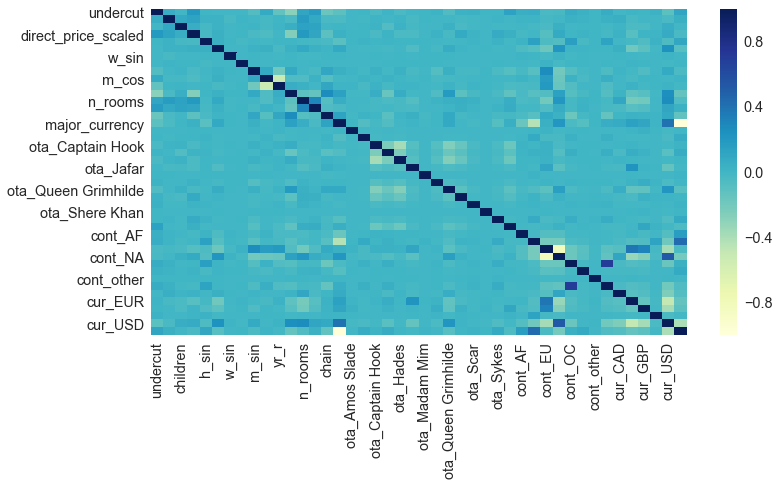

In [161]:
# corr['undercut']
sns.heatmap(corr, cmap="YlGnBu")

* This also shows we have some collinear features (correlated to each other) which is usually a problem and should be handled via some regularisation technique like Lasso feature selection or Ridge. For example, we exprench `chain` to be highly correlated to `n_hotels` as it is derived from there. Ideally we want to select an orthogonal set of features

# The model

Given the short time, I only had time to do a very simple train-test split of 80%-20% and also as model just used the simple `LogisticRegression`, which is very common for these type of classfication problems. Please see Future Work section below where I discuss some of the additional analysis I would have done given more time.

In [194]:
# Define the model
model = LogisticRegression(random_state=0)

print('Running model... took:')

start_time = time.time()

# split the data with 80% in train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8)

# fit the model on one set of data
model.fit(X_train, y_train)

# evaluate the model on the second set of data
y_test_model = model.predict(X_test)

print(accuracy_score(y_test, y_test_model))
print_runtime(start_time)



Running model... took:


/Users/tsando/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.656144242528
Run time: 0h:0m:2s


So with this very simple model we get an accuracy of ~66% percent, which isn't great but at least gives a good sign of the potential to get better scores given more data and feature engineering.

Also let's look a bit deeper at the confusion matrix to understand the false positives rate:

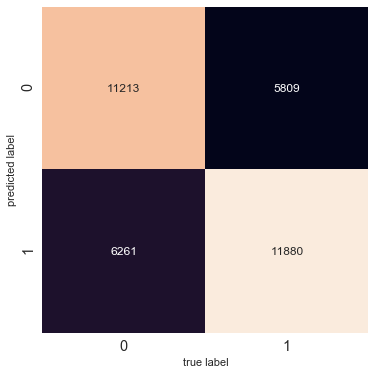

In [172]:
from sklearn.metrics import confusion_matrix

labels = np.sort(np.unique(y_test))
mat = confusion_matrix(y_test, y_test_model)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [176]:
from sklearn.metrics import recall_score
recall_score(y_test, y_test_model)

0.67160382158403531

So actually our recall is slightly better than the accuracy score quote above, which means we are actually doing better as predicting the true positives (the cases when the OTA undercuts)

In [201]:
from sklearn.tree import DecisionTreeClassifier
from undercut import run_simple

model = DecisionTreeClassifier(random_state=0)
run_simple(X, y, model)


Running model... took:


/Users/tsando/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.695532235589
Run time: 0h:0m:2s


So actually we see a RandomForests model is doing better than LogisticRegression in this case. The heatmap below also looks better

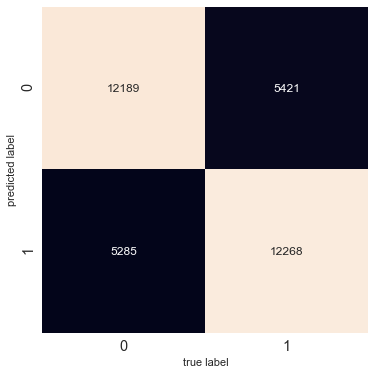

In [203]:
from sklearn.metrics import confusion_matrix

labels = np.sort(np.unique(y_test))
mat = confusion_matrix(y_test, y_test_model)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [204]:
recall_score(y_test, y_test_model)

0.69353835717112333

### Cross-validation

A bit rushed, but here's some cross-validation of the accuracy score using a 10-fold:

In [205]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

def cross_val_pipeline(X, y, model, cv):
    # Cross-validation
    print('Running pipeline... took:')
    start_time = time.time()

    pipeline = make_pipeline(model)
    scores = cross_val_score(pipeline, X, y, cv=cv)  # investigate how to speed up

    print_runtime(start_time)
    print('scores={}\nmean={:.4f}'.format(scores, np.mean(scores)))

model = DecisionTreeClassifier(random_state=0)
cross_val_pipeline(X, y, model, cv=10)

Running pipeline... took:
Run time: 0h:0m:27s
scores=[ 0.42935957  0.55232624  0.53458082  0.44016608  0.54817427  0.53526334
  0.39232082  0.38134243  0.49078498  0.43464164]
mean=0.4739


A bit discouraging to see the accuracy scores lower in the cross-validation, but this could be because of the little data we have and not very good feature engineering!

# Future Work

* Approach the problem as a **linear regression** task rather than Logistic Regressiob, i.e. the task is to forecast the OTA prices


* **Impute** missing values in `ota_price` and `user_country` to recover some data, specially to upsample the `undercut` class


* Investigate further validity of removing **outliers**. Also we did this in the full dataset, not on the train set, which is cheating as we are introducing forward-look bias (in practice we don't have all the data to know the distribution)


* Understand the validity of downsampling to balance the classes. Perhaps try other methods like **upsampling** the minority class instead, or **optimising on F1 or recall** to improve the model scores


* Do better **feature engineering** and avoid introducing biases from building features from the full datase rather than just the train set


* **Dimensionality reduction** of OTA feature, e.g. split by top 4 and 'other' instead of having all of then one-hot-encoded as there are perhaps too many and not all of them have enough training examples:

In [178]:
np.unique(df['ota'])

array(['Amos Slade', 'Big Bad Wolf', 'Captain Hook', 'Cruella De Vil',
       'Hades', 'Jafar', 'Madam Mim', 'Maleficent', 'Queen Grimhilde',
       'Queen of Hearts', 'Scar', 'Shere Khan', 'Sykes', 'The Evil Queen'], dtype=object)

* **Dimensionality reduction** of **collinear** features, using L1 or L2 regularisation, e.g. using `sklearn`'s `SelectFromModel` or via `penalty` parameter in `LogisticRegression`

In [170]:
from sklearn.feature_selection import SelectFromModel
logit = LogisticRegression(penalty="l1").fit(X, y)
model = SelectFromModel(logit, prefit=True)
X.columns[model.get_support()]

Index(['adults', 'children', 'direct_price_scaled', 'h_sin', 'h_cos', 'w_sin',
       'w_cos', 'm_sin', 'm_cos', 'yr_r', 'n_hotels', 'n_rooms', 'n_searches',
       'chain', 'major_currency', 'ota_Amos Slade', 'ota_Big Bad Wolf',
       'ota_Captain Hook', 'ota_Cruella De Vil', 'ota_Hades', 'ota_Jafar',
       'ota_Madam Mim', 'ota_Maleficent', 'ota_Queen Grimhilde',
       'ota_Queen of Hearts', 'ota_Scar', 'ota_Shere Khan', 'ota_Sykes',
       'ota_The Evil Queen', 'cont_AF', 'cont_AS', 'cont_EU', 'cont_NA',
       'cont_OC', 'cont_SA', 'cont_other', 'cur_AUD', 'cur_CAD', 'cur_EUR',
       'cur_GBP', 'cur_JPY', 'cur_USD', 'cur_other'],
      dtype='object')

* Understand why the **cross-validation** scores are so low compared to the train-test split 



* Model and hyper-parameter **optimisation** via `sklearn`'s `GridSearch`, e.g.:

```python
def grid_search_pipeline(X, y, models):
    # Gridsearch with CV
    print('Running pipeline... took:')
    start_time = time.time()

    pipe = Pipeline([('clf', SVC())])
    param_grid = dict(clf=models)

    grid_search = GridSearchCV(pipe, param_grid=param_grid)  # investigate how to speed up
    grid_search.fit(X, y)
    print(grid_search.best_estimator_)
    print(grid_search.best_score_)
    print_runtime(start_time)
    return grid_search
```


* remove levels with few or no observations in train or test set


* add holidays as special events